In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
uniEnroll = pd.DataFrame(pd.read_csv(r"C:\Users\hp\Downloads\university_enrollment_(Mini-project-01).csv", index_col = "course_id"))

In [21]:
uniEnroll['pre_requirement'] = uniEnroll['pre_requirement'].fillna('None')

In [32]:
uniEnroll[['post_score', 'pre_score']].isna().any()

post_score    True
pre_score     True
dtype: bool

In [31]:
uniEnroll[['post_score', 'pre_score']].isna().sum()

post_score    185
pre_score     130
dtype: int64

In [29]:
uniEnroll['pre_score'] = pd.to_numeric(uniEnroll['pre_score'], errors='coerce')

In [33]:
print("Skewness of pre_score:", uniEnroll['pre_score'].skew())
print("Skewness of post_score:", uniEnroll['post_score'].skew())

Skewness of pre_score: 0.047599983916211314
Skewness of post_score: 0.20502168745593682


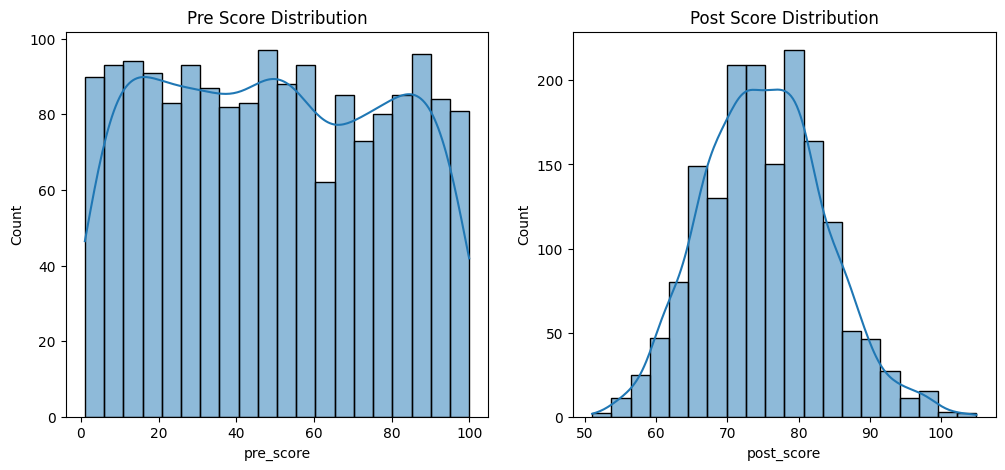

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(uniEnroll['pre_score'].dropna(), kde=True, bins=20)
plt.title('Pre Score Distribution')

plt.subplot(1,2,2)
sns.histplot(uniEnroll['post_score'].dropna(), kde=True, bins=20)
plt.title('Post Score Distribution')

plt.show()

In [36]:
uniEnroll['pre_score'] = uniEnroll['pre_score'].fillna(uniEnroll['pre_score'].mean())
uniEnroll['post_score'] = uniEnroll['post_score'].fillna(uniEnroll['post_score'].mean())

In [46]:
uniEnroll = uniEnroll.drop_duplicates()

In [47]:
print(uniEnroll.duplicated().sum())

0


In [48]:
uniEnroll = uniEnroll.drop_duplicates().reset_index(drop=True)

In [49]:
uniEnroll

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,classroom,2018,165,28.14,73.0,Beginner,Science
1,classroom,2020,175,79.68,86.0,None,Science
2,online,2016,257,57.24,80.0,None,Mathematics
3,online,2013,251,97.67,75.0,Beginner,Technology
4,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...
1839,classroom,2018,155,60.01,81.0,Intermediate,Science
1840,online,2016,261,94.27,85.0,None,Technology
1841,online,2011,257,76.00,81.0,None,Mathematics
1842,online,2013,256,20.67,66.0,None,Math


Text(0.5, 1.0, 'Course Type Distribution')

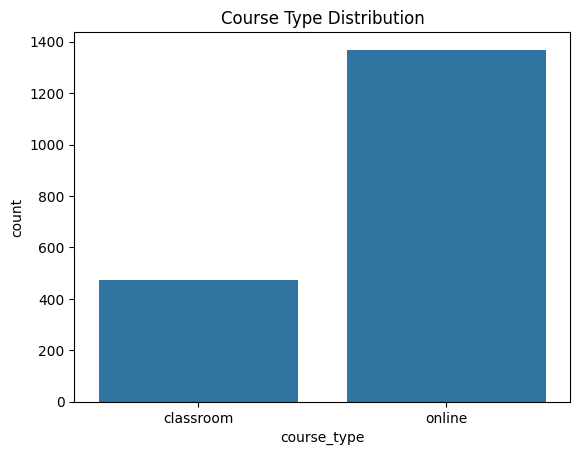

In [51]:
sns.countplot(x='course_type', data=uniEnroll)  
plt.title("Course Type Distribution") 

Text(0.5, 1.0, 'Enrollment Count by Course Type')

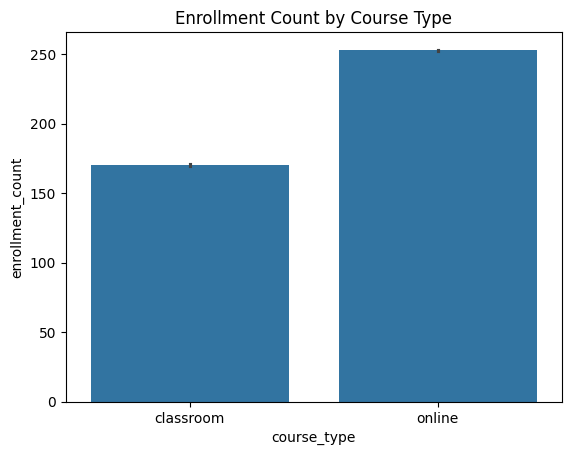

In [59]:
sns.barplot(x='course_type', y='enrollment_count', data=uniEnroll)  
plt.title("Enrollment Count by Course Type") 

Text(0.5, 1.0, 'Enrollment by Department')

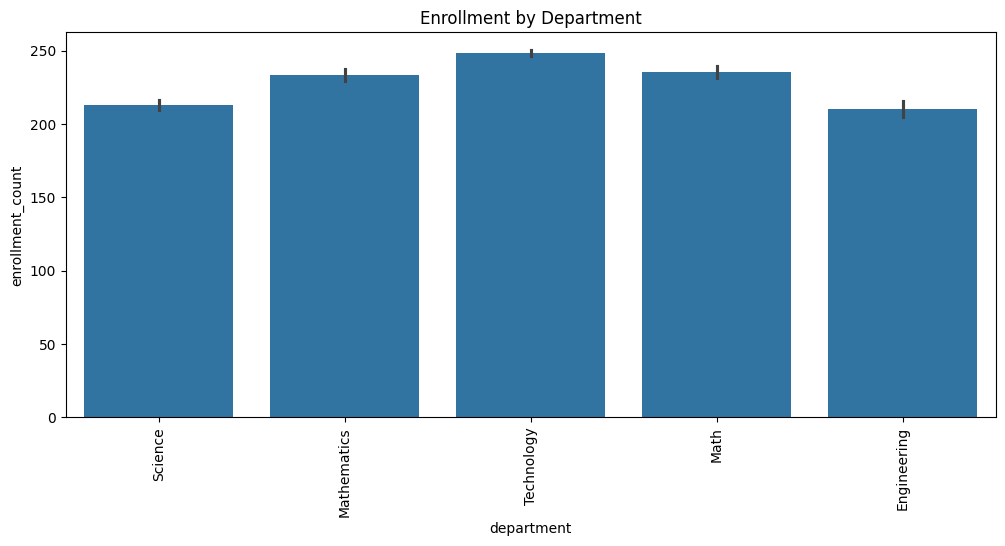

In [58]:
plt.figure(figsize=(12, 5))  
sns.barplot(x='department', y='enrollment_count', data=uniEnroll)  
plt.xticks(rotation=90)  
plt.title("Enrollment by Department")  

Text(0.5, 1.0, 'Enrollment by Pre-Req')

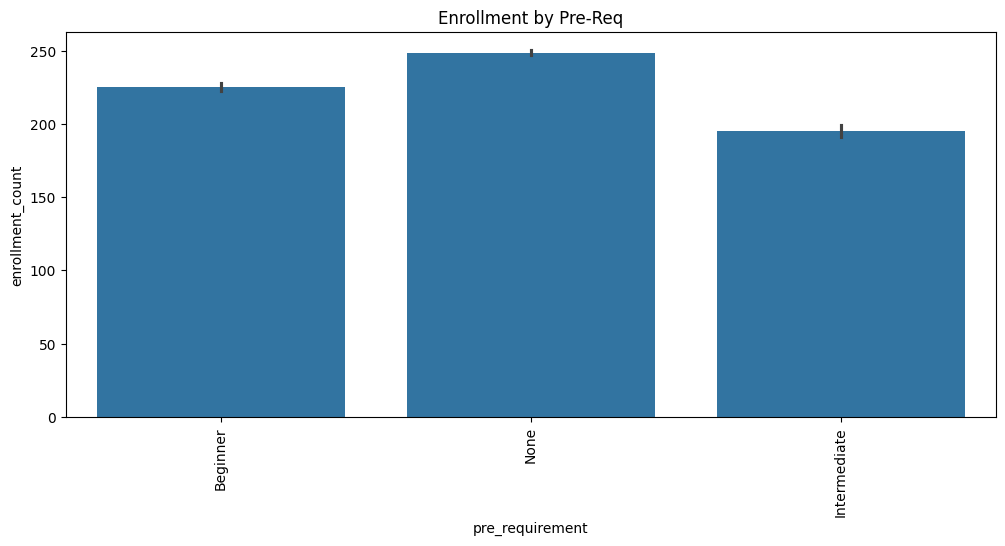

In [60]:
plt.figure(figsize=(12, 5))  
sns.barplot(x='pre_requirement', y='enrollment_count', data=uniEnroll)  
plt.xticks(rotation=90)  
plt.title("Enrollment by Pre-Req")  

## Insigts:

#### Department and Pre-Req does not have that much affect on enrollment
#### Online classes have more enrollment than physical classes but not a significant amount
#### The ratio 'course type:enrollments' is greater for physical classes